Generated weather sequence:
Day 1: Rain (with a chance of 1–3 in. of snow) until night, starting again in the afternoon.
Day 2: Light rain throughout the day.
Day 3: Rain until evening.
Day 4: Partly cloudy throughout the day.
Day 5: Possible light rain in the afternoon and evening.
Day 6: Clear throughout the day.
Day 7: Clear throughout the day.
Day 8: Clear throughout the day.
Day 9: Windy starting in the afternoon.
Day 10: Possible light snow (1–3 in.) in the morning and afternoon.
Day 11: Possible light snow (1–3 in.) in the afternoon.
Day 12: Partly cloudy throughout the day.
Day 13: Clear throughout the day.
Day 14: Clear throughout the day.
Day 15: Clear throughout the day.
Day 16: Foggy starting in the afternoon.
Day 17: Rain overnight.
Day 18: Rain in the morning.
Day 19: Rain in the morning and afternoon.
Day 20: Possible drizzle in the morning.
Day 21: Light rain starting in the afternoon.
Day 22: Mostly cloudy throughout the day.
Day 23: Clear throughout the day.
Day 24: P

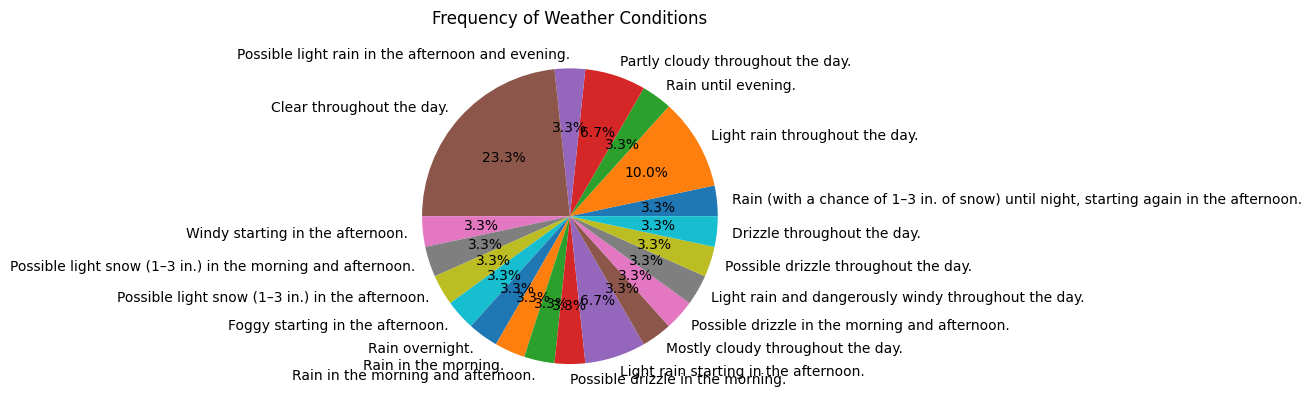

In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file into a pandas dataframe
df = pd.read_csv('daily_weather_2020.csv')

# Create a list of all the unique weather conditions in the dataset
weather_conditions = df['summary'].unique()

# Create a square matrix with the number of rows and columns equal to the number of unique weather conditions
num_conditions = len(weather_conditions)
transition_matrix = pd.DataFrame(0, index=weather_conditions, columns=weather_conditions)

# Count the number of times each transition occurs in the dataset and add the counts to the matrix
for i in range(len(df)-1):
    curr_weather = df.loc[i]['summary']
    next_weather = df.loc[i+1]['summary']
    transition_matrix.at[curr_weather, next_weather] += 1

# Normalize the matrix by dividing each row by the sum of its values
transition_matrix = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)


# Create a dictionary to map each weather condition to its index in the transition matrix
condition_map = {weather_conditions[i]: i for i in range(len(weather_conditions))}

# Define a function to generate a sequence of weather conditions based on the transition matrix
def generate_sequence(num_days):
    current_condition = df.iloc[0]['summary']
    sequence = [current_condition]
    for i in range(num_days-1):
        current_index = condition_map[current_condition]
        probabilities = list(transition_matrix.iloc[current_index])
        next_index = random.choices(range(num_conditions), weights=probabilities)[0]
        next_condition = weather_conditions[next_index]
        sequence.append(next_condition)
        current_condition = next_condition
    return sequence

# Generate a sequence of weather conditions for the next 30 days
num_days = 30
sequence = generate_sequence(num_days)

# Print the generated sequence of weather conditions
print("Generated weather sequence:")
for i in range(num_days):
    print(f"Day {i+1}: {sequence[i]}")


# Count the frequency of each weather condition in the generated sequence
counts = {}
for condition in sequence:
    if condition in counts:
        counts[condition] += 1
    else:
        counts[condition] = 1

# Create a list of the frequency of each weather condition
values = list(counts.values())

# Create a list of labels for the weather conditions
labels = list(counts.keys())

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%')
ax.set_title('Frequency of Weather Conditions')
plt.show()
